# Titanic - Machine Learning from Disaster

## Ensemble Adaboost Classifier

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyName,Kinship,Deck,Alone,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,2,73,1,8,0.0,0
1,1,1,0,38.0,1,0,596,71.28,0,3,136,1,2,0.0,0
2,1,3,0,26.0,0,0,669,7.92,2,1,251,0,8,1.0,0
3,1,1,0,35.0,1,0,49,26.55,2,3,198,1,2,0.0,0
4,0,3,1,35.0,0,0,472,8.05,2,2,11,0,8,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,4,406,0,8,1.0,0
887,1,1,0,19.0,0,0,14,30.00,2,1,221,0,1,1.0,0
888,0,3,0,29.0,1,2,675,11.72,2,1,293,3,8,0.0,0
889,1,1,1,26.0,0,0,8,30.00,0,2,52,0,2,1.0,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 14), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 14), (223,))

## Modeling

In [8]:
from common import functions as func

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

**Getting Best Hyperparameter Optimization**

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [9]:
# clf = AdaBoostClassifier()

# space = dict()
# space['n_estimators'] = [n for n in range(500)]
# space['learning_rate'] = [n for n in np.arange(0.1, 1.0, 0.1)]

# # space['splitter'] = ["best", "random"]
# # # space['max_depth'] = [n for n in range(10)]
# # space['min_samples_split'] = [n for n in range(10)]
# # space['min_samples_leaf'] = [n for n in range(10)]

# func.show_best_hyperparameter_optimization(clf, space, X_train, y_train)


Best Score: 0.8263832353384593
Best Hyperparameters: {'learning_rate': 0.30000000000000004, 'n_estimators': 432}

**Building, train and predict model**

In [10]:
clf = AdaBoostClassifier(
    n_estimators=430,
    learning_rate=0.3,
)

pipeline = make_pipeline(
    StandardScaler(),
    clf
)

_ = pipeline.fit(X_train, y_train)

__Check the most relevant features for the training model__

In [11]:
func.get_feature_importances(clf, X_train)

,Features,Relevance (%)
5,Ticket,31
9,FamilyName,25
2,Age,12
6,Fare,11
11,Deck,6
8,Title,5
1,Sex,4
10,Kinship,3
4,Parch,1
0,Pclass,0


__Predict and show model result__

In [12]:
y_predict = pipeline.predict(X_test)
func.show_model_result(clf, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.81564246 0.8258427  0.83146067 0.82022472 0.85955056]
Mean = 0.83 / Standard Deviation = 0.02

Confunsion Matrix
----------------------------------------------------------------------
[[112  22]
 [ 19  70]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       134
           1       0.76      0.79      0.77        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223

----------------------------------------------------------------------
Accuracy: 0.82
Precicion: 0.76
Sensitivity aka Recall: 0.79
F1-Score: 0.77


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.81
----------------------------------------------------------------------


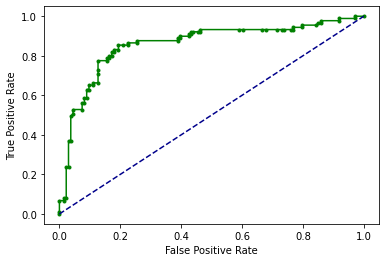

In [13]:
func.show_curve_roc(pipeline, X_test, y_test, y_predict)

__Compare Ground Truth vs Prediction Model__

In [14]:
func.get_error_prediction(X_test, y_test, y_predict)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyName,Kinship,Deck,Alone,AgeGroup,Ground Truth,Prediction
137,1,1,37.0,1,0,49,26.55,2,2,198,1,2,0.0,0,0,1
886,2,1,27.0,0,0,101,13.00,2,4,406,0,8,1.0,0,0,1
447,1,1,34.0,0,0,45,26.55,2,2,544,0,8,1.0,0,1,0
192,3,0,19.0,1,0,406,7.85,2,1,14,1,8,0.0,0,1,0
673,2,1,31.0,0,0,145,13.00,2,2,645,0,8,1.0,0,1,0
396,3,0,31.0,0,0,414,7.85,2,1,454,0,8,1.0,0,0,1
204,3,1,18.0,0,0,530,8.05,2,2,117,0,8,1.0,0,1,0
23,1,1,28.0,0,0,42,35.50,2,2,568,0,0,1.0,0,1,0
790,3,1,29.0,0,0,66,7.75,1,2,304,0,8,1.0,0,0,1
362,3,0,45.0,0,1,211,7.23,0,3,39,1,8,0.0,0,0,1
